# Análise dos resultados de traduções

In [1]:
import pandas as pd
import matplotlib

BASE_PATH = '../results'

In [2]:
def treat_data(df, drop_dups=True, drop_na=True):
  df = df.copy()
  if drop_dups: df = df.drop_duplicates()
  if drop_na: df = df.dropna()
  return df

In [3]:
cols = ['dataset', 'chrf_score', 'bleurt']
df_results = pd.DataFrame(columns=cols)

## DGT-TM

In [4]:
df = pd.read_csv(f'{BASE_PATH}/dgt_tm_en_es_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(51185, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,Commission Decision (EU) 2019/293,Decisión (UE) 2019/293 de la Comisión,Decisión (UE) 2019/293 de la Comisión,Decisión (UE) 2018/393 de la Comisión,0.814768,0.791992
1,of 8 November 2018,de 8 de noviembre de 2018,de 8 de noviembre de 2018,de 8 de noviembre de 2018,1.000000,0.968262
2,on the State aid SA.43785 (2018/C) (ex 2015/PN...,relativa a la ayuda estatal SA.43785 (2018/C) ...,relativa a la ayuda estatal SA.43785 (2018/C) ...,relativa a la ayuda estatal SA.34308 (2013/C) ...,0.414245,0.391357
3,(notified under document C(2018) 7308),[notificada con el número C(2018) 7308],[notificada con el número C(2018) 7308],[notificada con el número C(2018) 7304],0.941222,0.968262
4,(Only the Romanian text is authentic),(El texto en lengua rumana es el único auténtico),(El texto en lengua rumana es el único auténtico),(El texto en lengua rumana es el único auténtico),1.000000,1.021484


In [5]:
df.drop_duplicates().shape

(49635, 6)

In [6]:
df.isna().sum()

source           2
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [7]:
df.loc[df['source'].isna()]

,source,target,translation,search_result,chrf_score,bleurt
3863,NaN,N/D,N/D,S/N,0.111111,0.402100
35684,NaN,n/d,n.a.,n.d.,0.107527,0.662598


In [8]:
df = treat_data(df)
df.shape

(49633, 6)

In [9]:
df['chrf_score'].describe().apply("{0:.6f}".format)

count    49633.000000
mean         0.354347
std          0.221355
min          0.000000
25%          0.222727
50%          0.305714
75%          0.404218
max          1.000000
Name: chrf_score, dtype: object

In [10]:
df['bleurt'].describe().apply("{0:.6f}".format)

count    49633.000000
mean         0.352841
std          0.230898
min         -0.101501
25%          0.199463
50%          0.282715
75%          0.432373
max          1.160156
Name: bleurt, dtype: object

<Axes: >

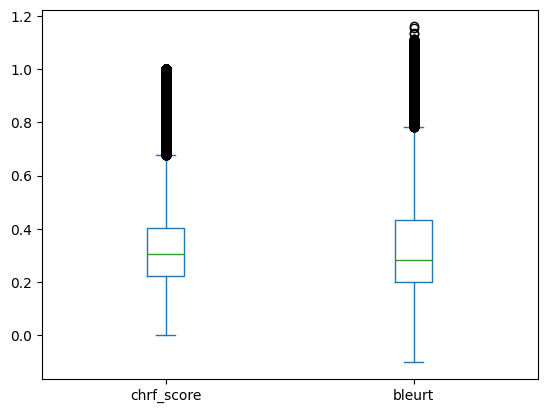

In [11]:
df[['chrf_score', 'bleurt']].plot.box()

In [12]:
df['dataset'] = 'DGT-TM'

In [13]:
df_results = df[cols]
df_results.shape

(49633, 3)

## KDE

In [14]:
df = pd.read_csv(f'{BASE_PATH}/kde_de_en_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(9543, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,Telefon@item:inlistbox,Telephone,Telephone,Telephone,1.000000,0.835449
1,Helikopter@item:inlistbox,Helicopter,Helicopter,Helicopter,1.000000,0.586426
2,Applaus@item:inlistbox,Applause,Let's hear it.,Listen To,0.041667,0.057739
3,Gewehrschuss@item:inlistbox,Gunshot,Gunshot,Gunshot,1.000000,0.928711
4,Perkussion %1,Percussion %1,Percussion %1,Slide %1,0.073844,0.302490


In [15]:
df.isna().sum()

source           1
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [16]:
df.drop_duplicates().shape

(9232, 6)

In [17]:
df = treat_data(df)
df.shape

(9231, 6)

In [18]:
df['chrf_score'].describe()

count    9.231000e+03
mean     3.066734e-01
std      2.364068e-01
min      1.000000e-16
25%      1.349064e-01
50%      2.430093e-01
75%      3.993350e-01
max      1.000000e+00
Name: chrf_score, dtype: float64

In [19]:
df['bleurt'].describe()

count    9231.000000
mean        0.463424
std         0.217540
min        -0.007626
25%         0.323608
50%         0.446777
75%         0.600098
max         1.165039
Name: bleurt, dtype: float64

<Axes: >

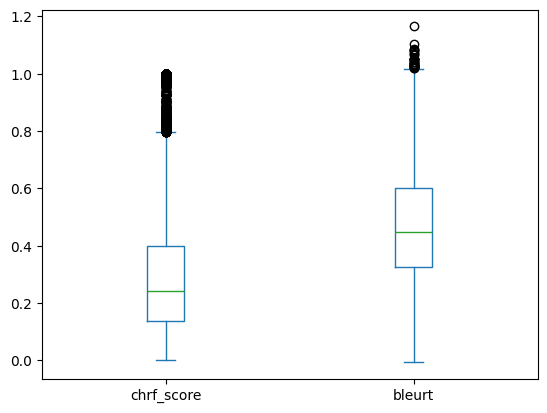

In [20]:
df[['chrf_score', 'bleurt']].plot.box()

In [21]:
df['dataset'] = 'KDE'

In [22]:
df_results = pd.concat([df_results, df[cols]])
df_results.shape

(58864, 3)

## Global Voices

In [23]:
df = pd.read_csv(f'{BASE_PATH}/global_voices_pt_en_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(10000, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,"Mitya Gutrin, ex-colega de Alexey e Irina, esc...","Mitya Gutrin, a former colleague of both Alexe...","Mitya Gutrin, former colleague of Alexey and I...",Marina Litvinovich (aka LJ user abstract2001) ...,0.203902,0.234253
1,O dinheiro raramente era devolvido e Kabanov a...,"The money was rarely returned, and Kabanov gen...",The money was rarely returned and Kabanov gene...,Bribes are described as “tea money” and hardly...,0.191022,0.392822
2,Gutrin escreveu:,Gutrin wrote:,Gutrin wrote:,Citizen wrote:,0.478502,0.379883
3,Sempre pensei que há um amplo abismo entre um ...,I always thought that a hefty chasm lies betwe...,I always thought there was a wide gap between ...,It feels like ferocious potential rapists and ...,0.250354,0.454346
4,"Agora sei que não é tão amplo quanto pensei, e...",Now I know that it isn't as large as I thought...,"Now I know it's not as broad as I thought, and...",So perhaps it's not all that bad. […],0.117007,0.430664


In [24]:
df.isna().sum()

source           0
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [25]:
df.drop_duplicates(subset=['source', 'target']).shape

(10000, 6)

In [26]:
df = treat_data(df)
df.shape

(10000, 6)

In [27]:
df['chrf_score'].describe()

count    1.000000e+04
mean     2.526606e-01
std      1.383117e-01
min      1.000000e-16
25%      1.759130e-01
50%      2.285026e-01
75%      2.889617e-01
max      9.965308e-01
Name: chrf_score, dtype: float64

In [28]:
df['bleurt'].describe()

count    10000.000000
mean         0.367365
std          0.150591
min          0.011833
25%          0.264160
50%          0.346924
75%          0.443115
max          0.973145
Name: bleurt, dtype: float64

<Axes: >

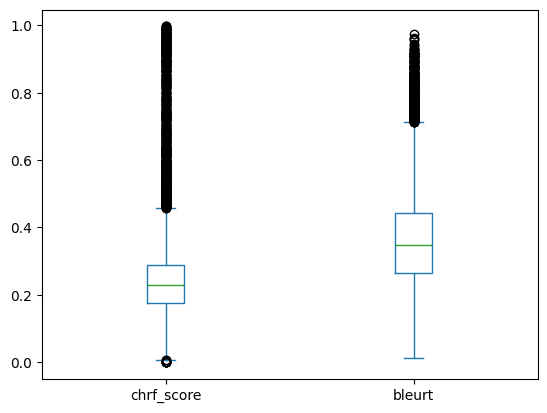

In [29]:
df[['chrf_score', 'bleurt']].plot.box()

In [30]:
df['dataset'] = 'Global Voices'

In [31]:
df_results = pd.concat([df_results, df[cols]])
df_results.shape

(68864, 3)

## United Nation

In [32]:
df = pd.read_csv(f'{BASE_PATH}/united_nation_en_fr_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(10000, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,19. Maintenance services. Provision under this...,Services d’entretien. Le montant prévu à cette...,19. Services d'entretien Le montant prévu à ce...,Indemnité de subsistance (missions). Le montan...,0.773737,0.394531
1,"Additionally, as indicated in paragraph 6 abov...","En outre, comme il a été noté plus haut au par...","En outre, comme il est indiqué au paragraphe 6...","Aux termes de ces arrangements, des dépenses c...",0.367461,0.258057
2,The total requirements under this heading are ...,"Au total, les sommes à prévoir à cette rubriqu...",Le montant total des ressources nécessaires à ...,Les ressources nécessaires sont estimées à 826...,0.674348,0.568848
3,20. Utilities. Provision for utilities is base...,"Éclairage, chauffage, énergie et eau. On a cal...",20. Services collectifs de distribution Les re...,Calculé sur la base d’une consommation journal...,0.273105,0.207153
4,The back-up power generation capacity is requi...,Les moyens de secours pour la production d’éle...,La capacité de production d'électricité de sec...,Fournitures d’entretien. Le montant prévu doit...,0.379619,0.230591


In [33]:
df.isna().sum()

source           0
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [34]:
df.drop_duplicates().shape

(9547, 6)

In [35]:
df = treat_data(df)
df.shape

(9547, 6)

In [36]:
df['chrf_score'].describe()

count    9.547000e+03
mean     3.904887e-01
std      2.142170e-01
min      1.000000e-16
25%      2.562523e-01
50%      3.274892e-01
75%      4.435421e-01
max      1.000000e+00
Name: chrf_score, dtype: float64

In [37]:
df['bleurt'].describe()

count    9547.000000
mean        0.323887
std         0.243464
min        -0.069580
25%         0.147095
50%         0.261719
75%         0.437866
max         1.076172
Name: bleurt, dtype: float64

<Axes: >

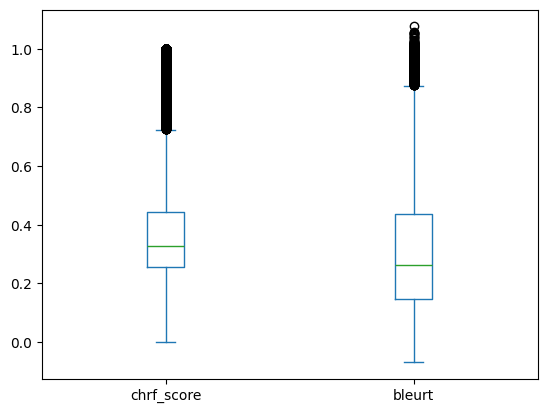

In [38]:
df[['chrf_score', 'bleurt']].plot.box()

In [39]:
df['dataset'] = 'United Nation'

In [40]:
df_results = pd.concat([df_results, df[cols]])
df_results.shape

(78411, 3)

## Comparação

In [42]:
df_results['dataset'].value_counts()

dataset
DGT-TM           49633
Global Voices    10000
United Nation     9547
KDE               9231
Name: count, dtype: int64

chrf_score    Axes(0.125,0.11;0.775x0.77)
dtype: object

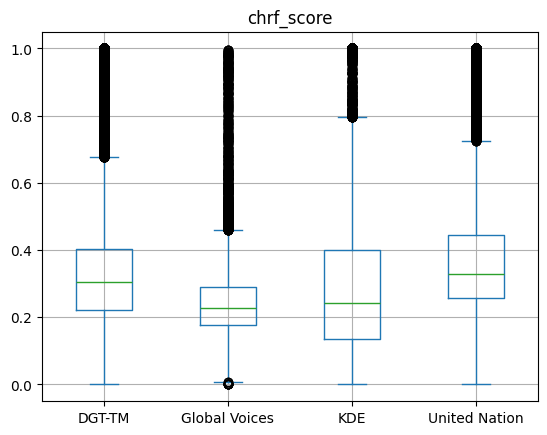

In [41]:
df_results.plot.box(column='chrf_score', by='dataset', grid=True)

bleurt    Axes(0.125,0.11;0.775x0.77)
dtype: object

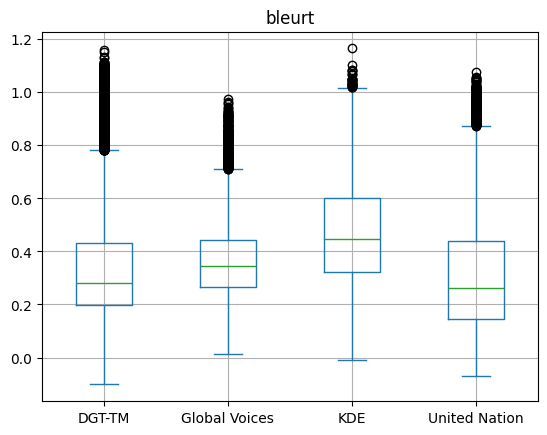

In [43]:
df_results.plot.box(column='bleurt', by='dataset', grid=True)